# Regressão

Neste caderno, apresentaremos as métricas que podem ser utilizadas na regressão.

Um conjunto de métricas é dedicado à regressão. Na verdade, as métricas de classificação não podem ser usadas para avaliar o desempenho de generalização dos modelos de regressão porque há uma diferença fundamental entre seu tipo de destino `target`: é uma variável contínua na regressão, enquanto uma variável discreta na classificação.

Usaremos o conjunto de dados de habitação Ames. O objetivo é prever o preço das casas na cidade de Ames, no estado de Iowa. Tal como acontece com a classificação, usaremos apenas uma única divisão de teste de trem para nos concentrarmos exclusivamente nas métricas de regressão.

In [1]:
from urllib.request import urlretrieve 
# lembre de sempre pegar o arquivo do tipo RAW no github 
url = 'https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/master/datasets/house_prices.csv'
urlretrieve(url, 'C:/Users/Rogerio Lopes/Desktop/Rogerio/Machine_Learning_With_Scikit_Learn/Module7_evaluanting_model_performance/house_prices.csv')

('C:/Users/Rogerio Lopes/Desktop/Rogerio/Machine_Learning_With_Scikit_Learn/Module7_evaluanting_model_performance/house_prices.csv',
 <http.client.HTTPMessage at 0x184ba958370>)

In [1]:
import pandas as pd
import numpy as np

ames_housing = pd.read_csv("house_prices.csv")
data = ames_housing.drop(columns="SalePrice")
target = ames_housing["SalePrice"]
data = data.select_dtypes(np.number)
target /= 1000

Vamos começar dividindo nosso conjunto de dados de introdução, um trem e um conjunto de teste.

In [2]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, shuffle=True, random_state = 0)

Alguns modelos de aprendizado de máquina são projetados para serem resolvidos como um problema de otimização: minimizando um erro (também conhecido como função de perda) usando um conjunto de treinamento. Uma função de perda básica usada na regressão é o erro quadrático médio (MSE). Assim, esta métrica é por vezes utilizada para avaliar o modelo, uma vez que é otimizada por esse modelo.

Daremos um exemplo usando um modelo de regressão linear.

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regressor = LinearRegression()
regressor.fit(data_train, target_train)
target_predicted = regressor.predict(data_train)

print(f"Mean squared error on the training set: "
      f"{mean_squared_error(target_train, target_predicted):.3f}")

Mean squared error on the training set: 996.902


Nosso modelo de regressão linear está minimizando o erro quadrático médio no conjunto de treinamento. Isso significa que não há outro conjunto de coeficientes que diminuirá o erro.

Então, podemos calcular o erro quadrático médio no conjunto de teste.

In [4]:
target_predicted = regressor.predict(data_test)

print(f"Mean squared error on the testing set: "
      f"{mean_squared_error(target_test, target_predicted):.3f}")

Mean squared error on the testing set: 2064.736


O MSE bruto pode ser difícil de interpretar. Uma maneira é redimensionar o MSE pela variação do alvo. Esta pontuação é conhecida como
 $R^2$
também chamado de coeficiente de determinação. Na verdade, essa é a pontuação padrão usada no scikit-learn ao chamar o método `score`.

In [5]:
regressor.score(data_test, target_test)

0.6872520581075554

o $R^2$ pontuação representa a proporção da variância da meta que é explicada pelas variáveis ​​independentes no modelo. A melhor pontuação possível é 1, mas não há limite inferior. No entanto, um modelo que prevê o valor esperado da meta obteria uma pontuação de 0.

In [6]:
from sklearn.dummy import DummyRegressor

dummy_regressor = DummyRegressor(strategy="mean")
dummy_regressor.fit(data_train, target_train)
print(f"R2 score for a regressor predicting the mean:"
      f"{dummy_regressor.score(data_test, target_test):.3f}")

R2 score for a regressor predicting the mean:-0.000


o $R^2$ pontuação fornece uma visão sobre a qualidade do ajuste do modelo. No entanto, essa pontuação não pode ser comparada de um conjunto de dados a outro e o valor obtido não tem uma interpretação significativa em relação à unidade original do alvo. Se quiséssemos obter uma pontuação interpretável, estaríamos interessados ​​na mediana ou no erro médio absoluto.

In [7]:
from sklearn.metrics import mean_absolute_error

target_predicted = regressor.predict(data_test)
print(f"Mean absolute error: "
      f"{mean_absolute_error(target_test, target_predicted):.3f} k$")

Mean absolute error: 22.608 k$


Ao calcular o erro médio absoluto, podemos interpretar que nosso modelo está prevendo em média 22,6 k $ de distância do preço real da casa. Uma desvantagem dessa métrica é que a média pode ser afetada por um grande erro. Para alguns aplicativos, não queremos que esses erros grandes tenham uma influência tão grande em nossa métrica. Neste caso, podemos usar o erro absoluto mediano.

In [8]:
from sklearn.metrics import median_absolute_error

print(f"Median absolute error: "
      f"{median_absolute_error(target_test, target_predicted):.3f} k$")

Median absolute error: 14.137 k$


O erro absoluto médio (ou erro absoluto mediano) ainda tem uma limitação conhecida: cometer um erro de 50 k $ para uma casa avaliada em 50 k \ $ tem o mesmo impacto que cometer um erro de "50k$" para uma casa avaliada em "500k\$". Na verdade, o erro médio absoluto não é relativo.

O erro percentual absoluto médio introduz esta escala relativa.

In [9]:
from sklearn.metrics import mean_absolute_percentage_error

print(f"Mean absolute percentage error: "
      f"{mean_absolute_percentage_error(target_test, target_predicted) * 100:.3f} %")

Mean absolute percentage error: 13.574 %


Além das métricas, podemos representar visualmente os resultados traçando os valores previstos versus os valores reais.

In [10]:
predicted_actual = {
    "True values (k$)": target_test, "Predicted values (k$)": target_predicted}
predicted_actual = pd.DataFrame(predicted_actual)

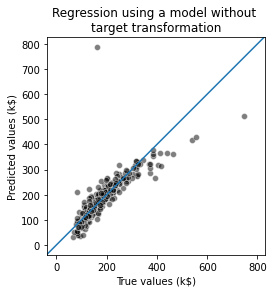

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=predicted_actual,
                x="True values (k$)", y="Predicted values (k$)",
                color="black", alpha=0.5)
plt.axline((0, 0), slope=1, label="Perfect fit")
plt.axis('square')
_ = plt.title("Regression using a model without \ntarget transformation")

Neste gráfico, as previsões corretas estariam na linha diagonal. Este gráfico permite detectar se o modelo comete erros de forma consistente, ou seja, possui algum viés.

Neste gráfico, vemos que para os grandes valores de preços True, nosso modelo tende a subestimar o preço da casa. Normalmente, esse problema surge quando o destino a ser previsto não segue uma distribuição normal. Nesse caso, o modelo se beneficiaria com a transformação do destino.

In [12]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.compose import TransformedTargetRegressor

transformer = QuantileTransformer(
    n_quantiles=900, output_distribution="normal")
model_transformed_target = TransformedTargetRegressor(
    regressor=regressor, transformer=transformer)
model_transformed_target.fit(data_train, target_train)
target_predicted = model_transformed_target.predict(data_test)

In [13]:
predicted_actual = {
    "True values (k$)": target_test, "Predicted values (k$)": target_predicted}
predicted_actual = pd.DataFrame(predicted_actual)

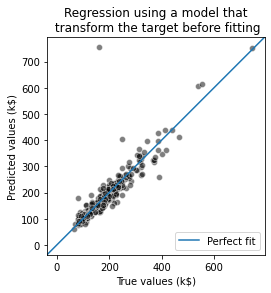

In [14]:
sns.scatterplot(data=predicted_actual,
                x="True values (k$)", y="Predicted values (k$)",
                color="black", alpha=0.5)
plt.axline((0, 0), slope=1, label="Perfect fit")
plt.axis('square')
plt.legend()
_ = plt.title("Regression using a model that\n transform the target before "
              "fitting")

Assim, uma vez que transformamos o alvo, vemos que corrigimos alguns dos valores altos.

# 📝 Exercício M7.03
Tal como acontece com o exercício de métricas de classificação, avaliaremos as métricas de regressão dentro de uma estrutura de validação cruzada para nos familiarizarmos com a sintaxe.

Usaremos o conjunto de dados de preços de casas Ames.

In [15]:
import pandas as pd
import numpy as np

ames_housing = pd.read_csv("house_prices.csv")
data = ames_housing.drop(columns="SalePrice")
target = ames_housing["SalePrice"]
data = data.select_dtypes(np.number)
target /= 1000

A primeira etapa será criar um modelo de regressão linear.

In [17]:
# solution
from sklearn.linear_model import LinearRegression

model = LinearRegression()

Em seguida, use o `cross_val_score` para estimar o desempenho de generalização do modelo. Use uma `KFold` validação cruzada com 10 dobras. Faça uso do $R^2$ pontuação explícita atribuindo o parâmetro `scoring`(embora seja a pontuação padrão).

In [18]:
# solution
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, data, target, cv=10, scoring="r2")
print(f"R2 score: {scores.mean():.3f} +/- {scores.std():.3f}")

R2 score: 0.794 +/- 0.103


Então, em vez de usar o $R^2$ pontuação, use o erro absoluto médio. Você precisa consultar a documentação do `scoring` parâmetro.

In [19]:
# solution
scores = cross_val_score(model, data, target, cv=10,
                         scoring="neg_mean_absolute_error")
errors = -scores
print(f"Mean absolute error: "
      f"{errors.mean():.3f} k$ +/- {errors.std():.3f}")

Mean absolute error: 21.892 k$ +/- 2.225


Por fim, use a `cross_validate` função e calcule várias pontuações / erros de uma vez, passando uma lista de pontuadores para o `scoring` parâmetro. Você pode calcular o $R^2$ pontuação e o erro médio absoluto, por exemplo.

In [20]:
# solution
from sklearn.model_selection import cross_validate

scoring = ["r2", "neg_mean_absolute_error"]
cv_results = cross_validate(model, data, target, scoring=scoring)

In [21]:
import pandas as pd

scores = {"R2": cv_results["test_r2"],
          "MSE": -cv_results["test_neg_mean_absolute_error"]}
scores = pd.DataFrame(scores)
scores

,R2,MSE
0,0.848721,21.256799
1,0.816374,22.084083
2,0.813513,22.113367
3,0.814138,20.448279
4,0.637473,24.370341
